___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Bibliotecas necessárias
#from numpy.random import shuffle, randint, choice


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

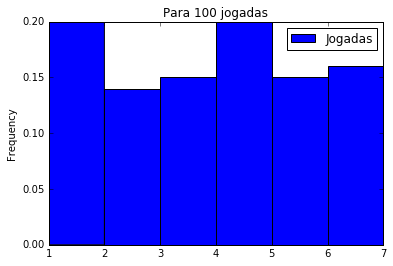

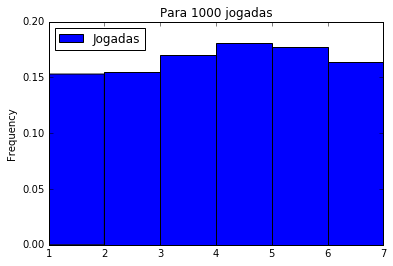

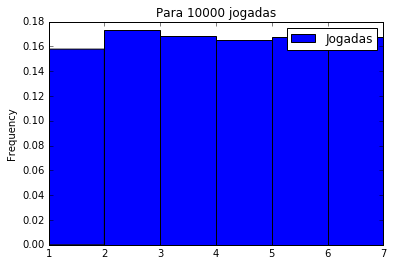

In [2]:
faixas = range(1,8)

jogadas = []
for i in range(100):
    jogadas.append(np.random.randint(1,7))
data = pd.DataFrame({'Jogadas':jogadas})
plot = data.plot(kind='hist',normed=1,bins = faixas)
plt.title('Para 100 jogadas')
plt.show()

jogadas = []
for i in range(1000):
    jogadas.append(np.random.randint(1,7))
data = pd.DataFrame({'Jogadas':jogadas})
plot = data.plot(kind='hist',normed=1,bins = faixas)
plt.title('Para 1000 jogadas')
plt.show()

jogadas = []
for i in range(10000):
    jogadas.append(np.random.randint(1,7))
data = pd.DataFrame({'Jogadas':jogadas})
plot = data.plot(kind='hist',normed=1,bins = faixas)
plt.title('Para 10000 jogadas')
plt.show()


Conforme aumenta o numero de jogadas, a probabilidade se aproxima da probabilidade teorica.

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

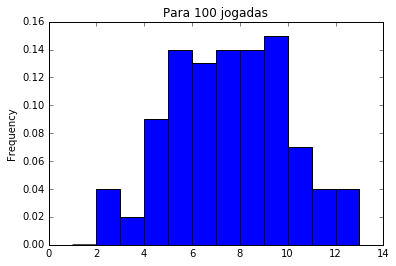

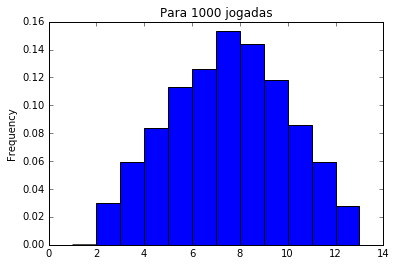

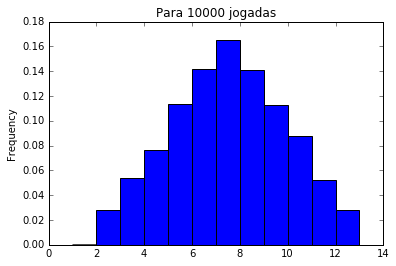

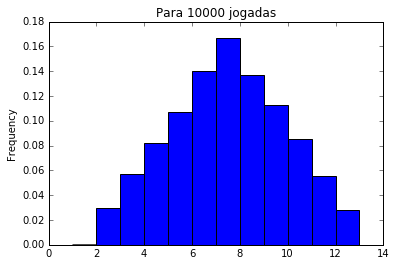

A probabilidade de a soma ser 7 é 16%.


In [60]:
faixa = range(1,14)


jogada1 = []
jogada2 = []
soma = []
for i in range(100):
    a1 = np.random.randint(1,7)
    a2 = np.random.randint(1,7)
    s = a1+a2
    jogada1.append(a1)
    jogada2.append(a2)
    soma.append(s)
data = pd.DataFrame({'Jogada1':jogada1,'Jogada2':jogada2,'Soma':soma})
plot = data.Soma.plot(kind='hist',normed=1,bins = faixa)
plt.title('Para 100 jogadas')
plt.show()



jogada1 = []
jogada2 = []
soma = []
for i in range(1000):
    a1 = np.random.randint(1,7)
    a2 = np.random.randint(1,7)
    s = a1+a2
    jogada1.append(a1)
    jogada2.append(a2)
    soma.append(s)
data = pd.DataFrame({'Jogada1':jogada1,'Jogada2':jogada2,'Soma':soma})
plot = data.Soma.plot(kind='hist',normed=1,bins = faixa)
plt.title('Para 1000 jogadas')
plt.show()



jogada1 = []
jogada2 = []
soma = []
for i in range(10000):
    a1 = np.random.randint(1,7)
    a2 = np.random.randint(1,7)
    s = a1+a2
    jogada1.append(a1)
    jogada2.append(a2)
    soma.append(s)
data = pd.DataFrame({'Jogada1':jogada1,'Jogada2':jogada2,'Soma':soma})
plot = data.Soma.plot(kind='hist',normed=1,bins = faixa)
plt.title('Para 10000 jogadas')
plt.show()


jogada1 = []
jogada2 = []
soma = []

s7 = 0
for i in range(10000):
    a1 = np.random.randint(1,7)
    soma.append(a1)
    b = np.random.randint(1,7)
    soma[-1]+=b
data = pd.DataFrame({'Soma':soma})
plot = data.Soma.plot(kind='hist',normed=1,bins = faixa)
plt.title('Para 10000 jogadas')
plt.show()
print('''A probabilidade de a soma ser 7 é 16%.''')

## Resposta:

A probabilidade é igual pois os dois eventos são independentes.

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [56]:
somaperde = 0
somaganha = 0

for i in range(1000):
    p1 = np.random.randint(1,4)
    p2 = np.random.randint(1,4)
    p3 = p2
    while p3 == p2 or p3 == p1:
        p3 = np.random.randint(1,4)
    if p1 == p2:
        somaperde +=1
    else:
        somaganha +=1
        
print(somaganha/10,somaperde/10)

66.1 33.9
